<a href="https://colab.research.google.com/github/octaviamardiana/simulasi_kendali_fuzzy-lampu/blob/main/simulasi_kendali_fuzzy_lampu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kecepatan kipas untuk suhu 28°C: 59.26%


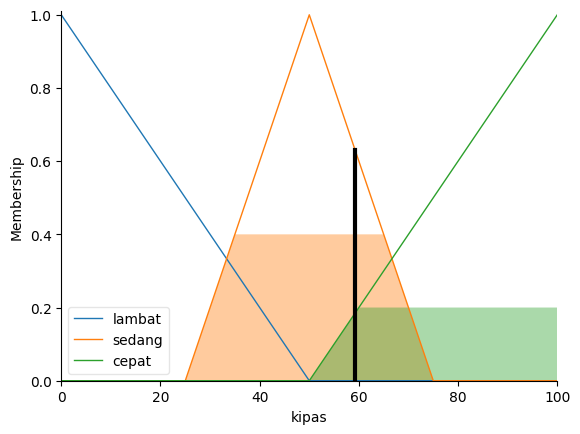

In [4]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
# 1. Definisi variabel linguistik
suhu = ctrl.Antecedent(np.arange(0, 41, 1), 'suhu') # suhu dalam °C
kipas = ctrl.Consequent(np.arange(0, 101, 1), 'kipas') # kecepatan kipas (%)
# 2. Fungsi keanggotaan
suhu['dingin'] = fuzz.trimf(suhu.universe, [0, 0, 20])
suhu['nyaman'] = fuzz.trimf(suhu.universe, [15, 25, 30])
suhu['panas'] = fuzz.trimf(suhu.universe, [25, 40, 40])
kipas['lambat'] = fuzz.trimf(kipas.universe, [0, 0, 50])
kipas['sedang'] = fuzz.trimf(kipas.universe, [25, 50, 75])
kipas['cepat'] = fuzz.trimf(kipas.universe, [50, 100, 100])
# 3. Aturan fuzzy
rule1 = ctrl.Rule(suhu['dingin'], kipas['lambat'])
rule2 = ctrl.Rule(suhu['nyaman'], kipas['sedang'])
rule3 = ctrl.Rule(suhu['panas'], kipas['cepat'])
# 4. Sistem kontrol
sistem_kipas_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
sistem_kipas = ctrl.ControlSystemSimulation(sistem_kipas_ctrl)
# 5. Simulasi: Masukkan suhu tertentu
sistem_kipas.input['suhu'] = 28
sistem_kipas.compute()
# 6. Output hasil defuzzifikasi
print(f"Kecepatan kipas untuk suhu 28°C: {sistem_kipas.output['kipas']:.2f}%")
kipas.view(sim=sistem_kipas)
plt.show()

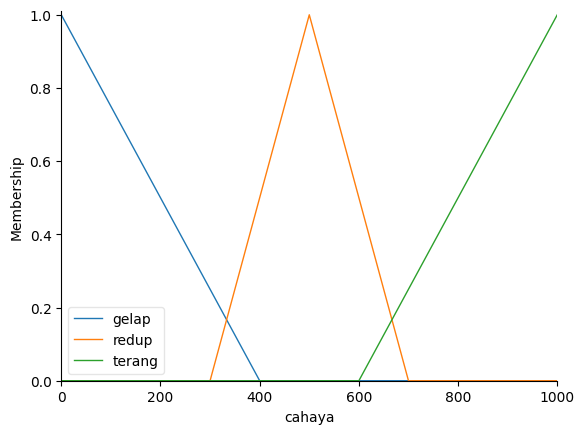

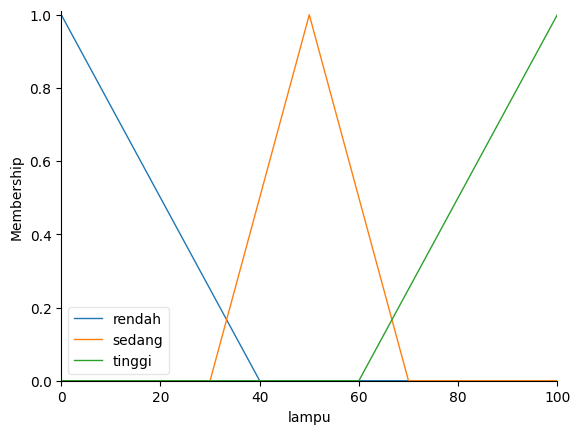

Simulasi Sistem Penerangan Otomatis:
 - Input cahaya: 50 lux -> Output kecerahan lampu: 79.93%


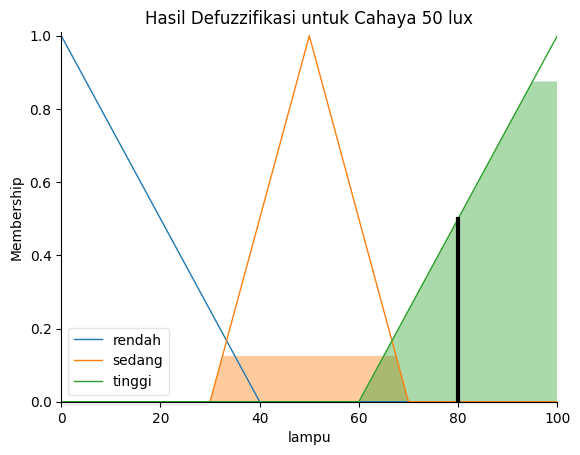

 - Input cahaya: 400 lux -> Output kecerahan lampu: 64.74%


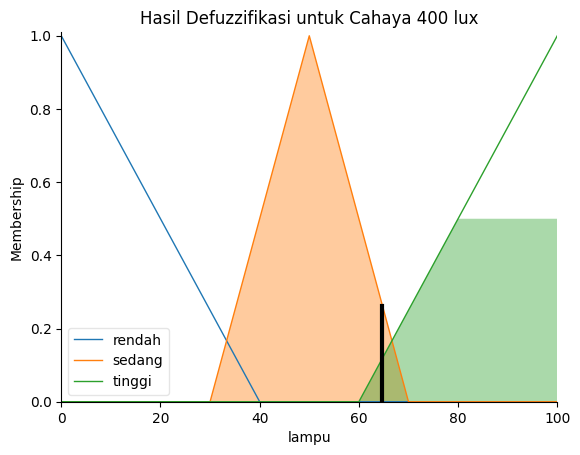

 - Input cahaya: 850 lux -> Output kecerahan lampu: 29.20%


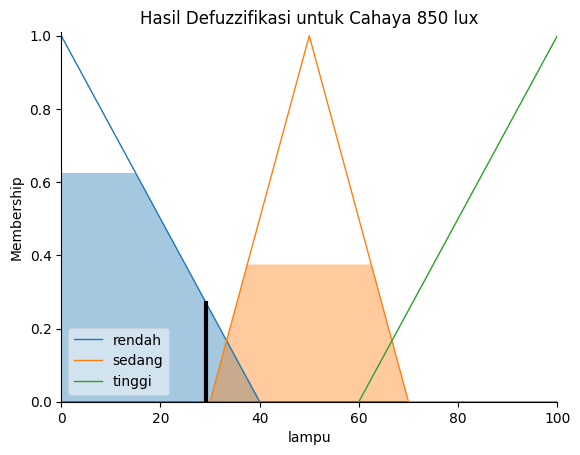

In [10]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Definisi variabel linguistik
cahaya = ctrl.Antecedent(np.arange(0, 1001, 1), 'cahaya')  # input lux 0-1000
lampu = ctrl.Consequent(np.arange(0, 101, 1), 'lampu')     # output PWM 0-100%

# 2. Fungsi keanggotaan (segitiga)
cahaya['gelap'] = fuzz.trimf(cahaya.universe, [0, 0, 400])
cahaya['redup'] = fuzz.trimf(cahaya.universe, [300, 500, 700])
cahaya['terang'] = fuzz.trimf(cahaya.universe, [600, 1000, 1000])

lampu['rendah'] = fuzz.trimf(lampu.universe, [0, 0, 40])
lampu['sedang'] = fuzz.trimf(lampu.universe, [30, 50, 70])
lampu['tinggi'] = fuzz.trimf(lampu.universe, [60, 100, 100])

# Visualisasi fungsi keanggotaan input dan output
cahaya.view()
plt.show()
lampu.view()
plt.show()

# 3. Aturan fuzzy (versi kompleks)
rule1 = ctrl.Rule(cahaya['gelap'] | cahaya['redup'], lampu['tinggi'])
rule2 = ctrl.Rule(cahaya['redup'] & ~cahaya['terang'], lampu['sedang'])
rule3 = ctrl.Rule(cahaya['terang'], lampu['rendah'])
rule4 = ctrl.Rule(cahaya['gelap'], lampu['tinggi'])
rule5 = ctrl.Rule(~cahaya['gelap'] & ~cahaya['terang'], lampu['sedang'])

# 4. Sistem kontrol fuzzy
sistem_lampu_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
sistem_lampu = ctrl.ControlSystemSimulation(sistem_lampu_ctrl)

# 5. Simulasi dengan 3 nilai input lux
nilai_lux = [50, 400, 850]
print("Simulasi Sistem Penerangan Otomatis:")
for nilai in nilai_lux:
    sistem_lampu.input['cahaya'] = nilai
    sistem_lampu.compute()
    hasil_pwm = sistem_lampu.output['lampu']
    print(f" - Input cahaya: {nilai} lux -> Output kecerahan lampu: {hasil_pwm:.2f}%")

    # Visualisasi hasil defuzzifikasi untuk tiap input
    lampu.view(sim=sistem_lampu)
    plt.title(f"Hasil Defuzzifikasi untuk Cahaya {nilai} lux")
    plt.show()
